<a href="https://colab.research.google.com/github/FeritMario/Obrada-slike-projekt/blob/main/Obrada%20slike-novo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

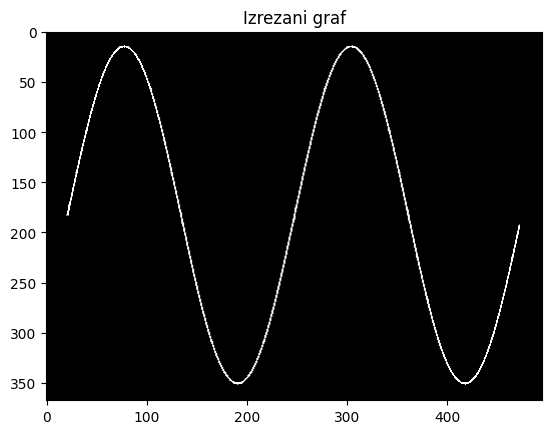

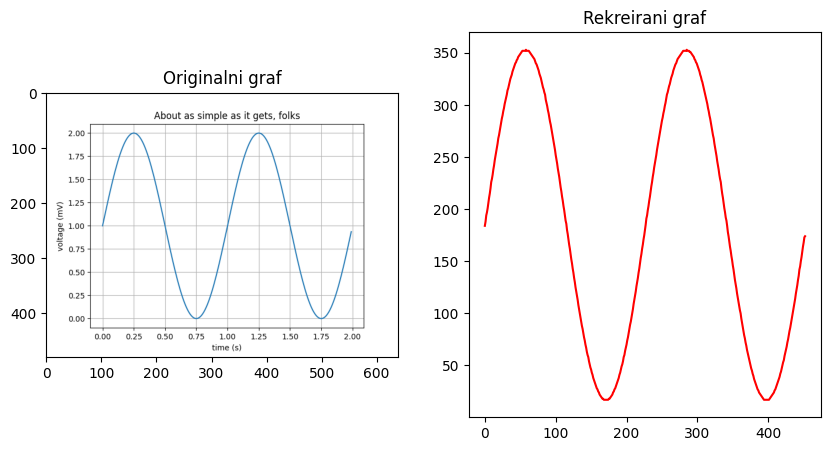

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread('slik.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


_, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)


edges = cv2.Canny(thresh, 80, 150)


contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


if len(contours) == 0:
    print("Nisu pronađene konture. Provjeri thresholding i detekciju rubova.")
else:

    graph_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(graph_contour)


    graph_region = thresh[y:y + h, x:x + w]


    plt.figure()
    plt.imshow(graph_region, cmap='gray')
    plt.title('Izrezani graf')
    plt.show()


    graph_values = []
    start_saving = False
    stop_saving = False

    for i in range(w):
        column = graph_region[:, i]


        graph_line_y = np.argmax(column)


        if graph_line_y > 0:
            start_saving = True
        elif start_saving and graph_line_y == 0:
            stop_saving = True


        if stop_saving:
            break


        if start_saving and not stop_saving:
            value = h - 1 - graph_line_y
            graph_values.append(value)


    x_values = np.arange(len(graph_values))


    plt.figure(figsize=(10, 5))

    # Originalna slika
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Originalni graf")

    # Rekreirani graf
    plt.subplot(1, 2, 2)
    plt.plot(x_values, graph_values, color='red')
    plt.title("Rekreirani graf")

    plt.show()
